---

### このコードは、指定したエリアの室内温度, 室外機の消費電力りょうを予測する処理をデバッグする<br>

入力情報:

- 時間特徴量
- 1 時間前の室内温度
- 室内機の制御情報
- 室内機の制御情報をもとに特徴量エンジニアリングを施した情報
- 天気情報

出力情報:

- 室内温度
- 室外機の消費電力量


### モジュール取得


In [1]:
import pandas as pd
from service.prediction import AreaHVACModelManager

### 入力値取得


In [2]:
base_df = pd.read_csv("data/base/hourly_filled.csv")
base_df["Datetime_hour"] = pd.to_datetime(base_df["Datetime_hour"])
base_df = base_df.set_index("Datetime_hour", drop=True)

In [3]:
AreaModelApi = AreaHVACModelManager()
AreaModelApi.set_origin_data(base_df)
area_unit_names = AreaModelApi.area_info

Area1 の学習中...


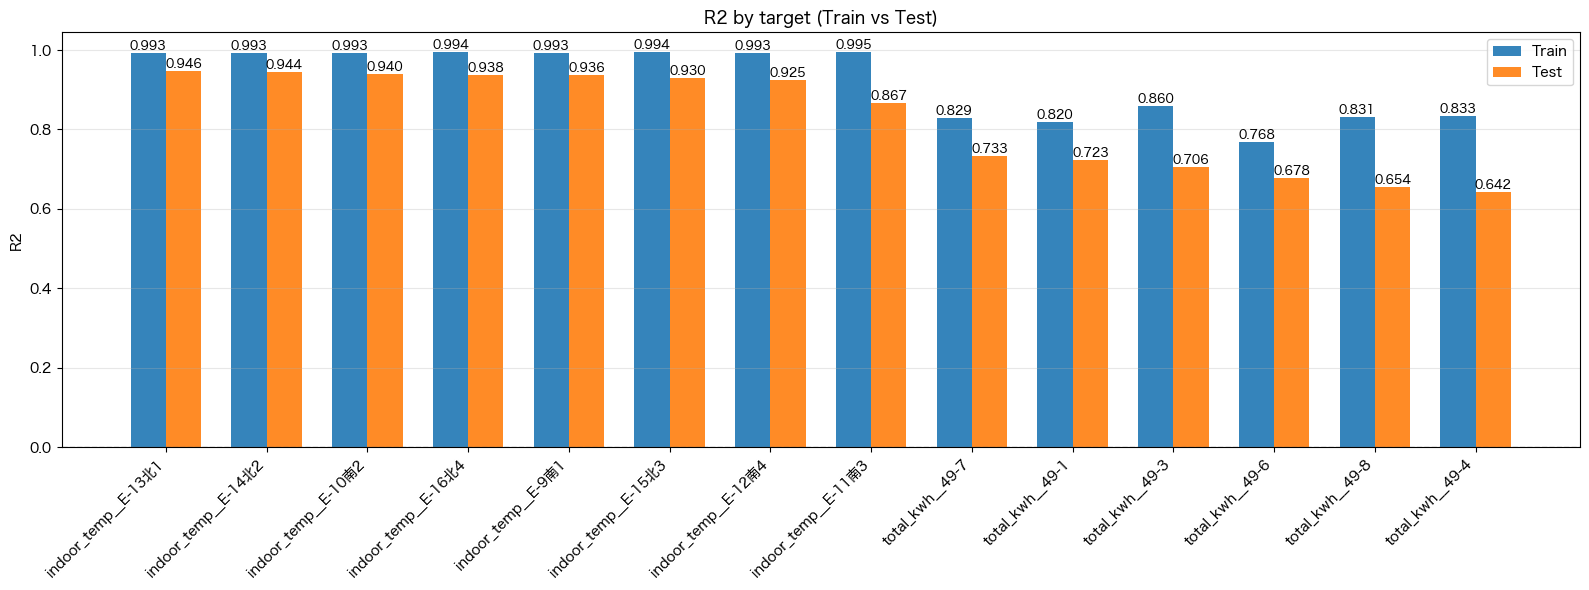

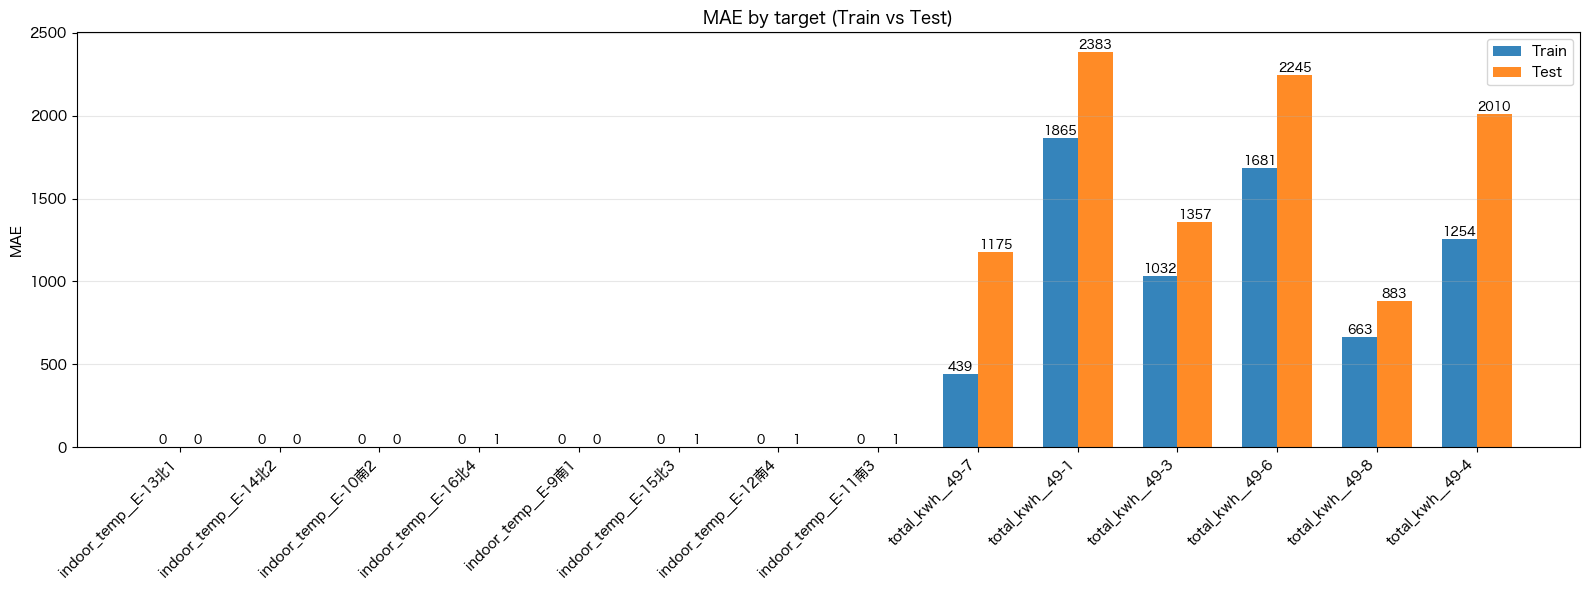

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Area2 の学習中...


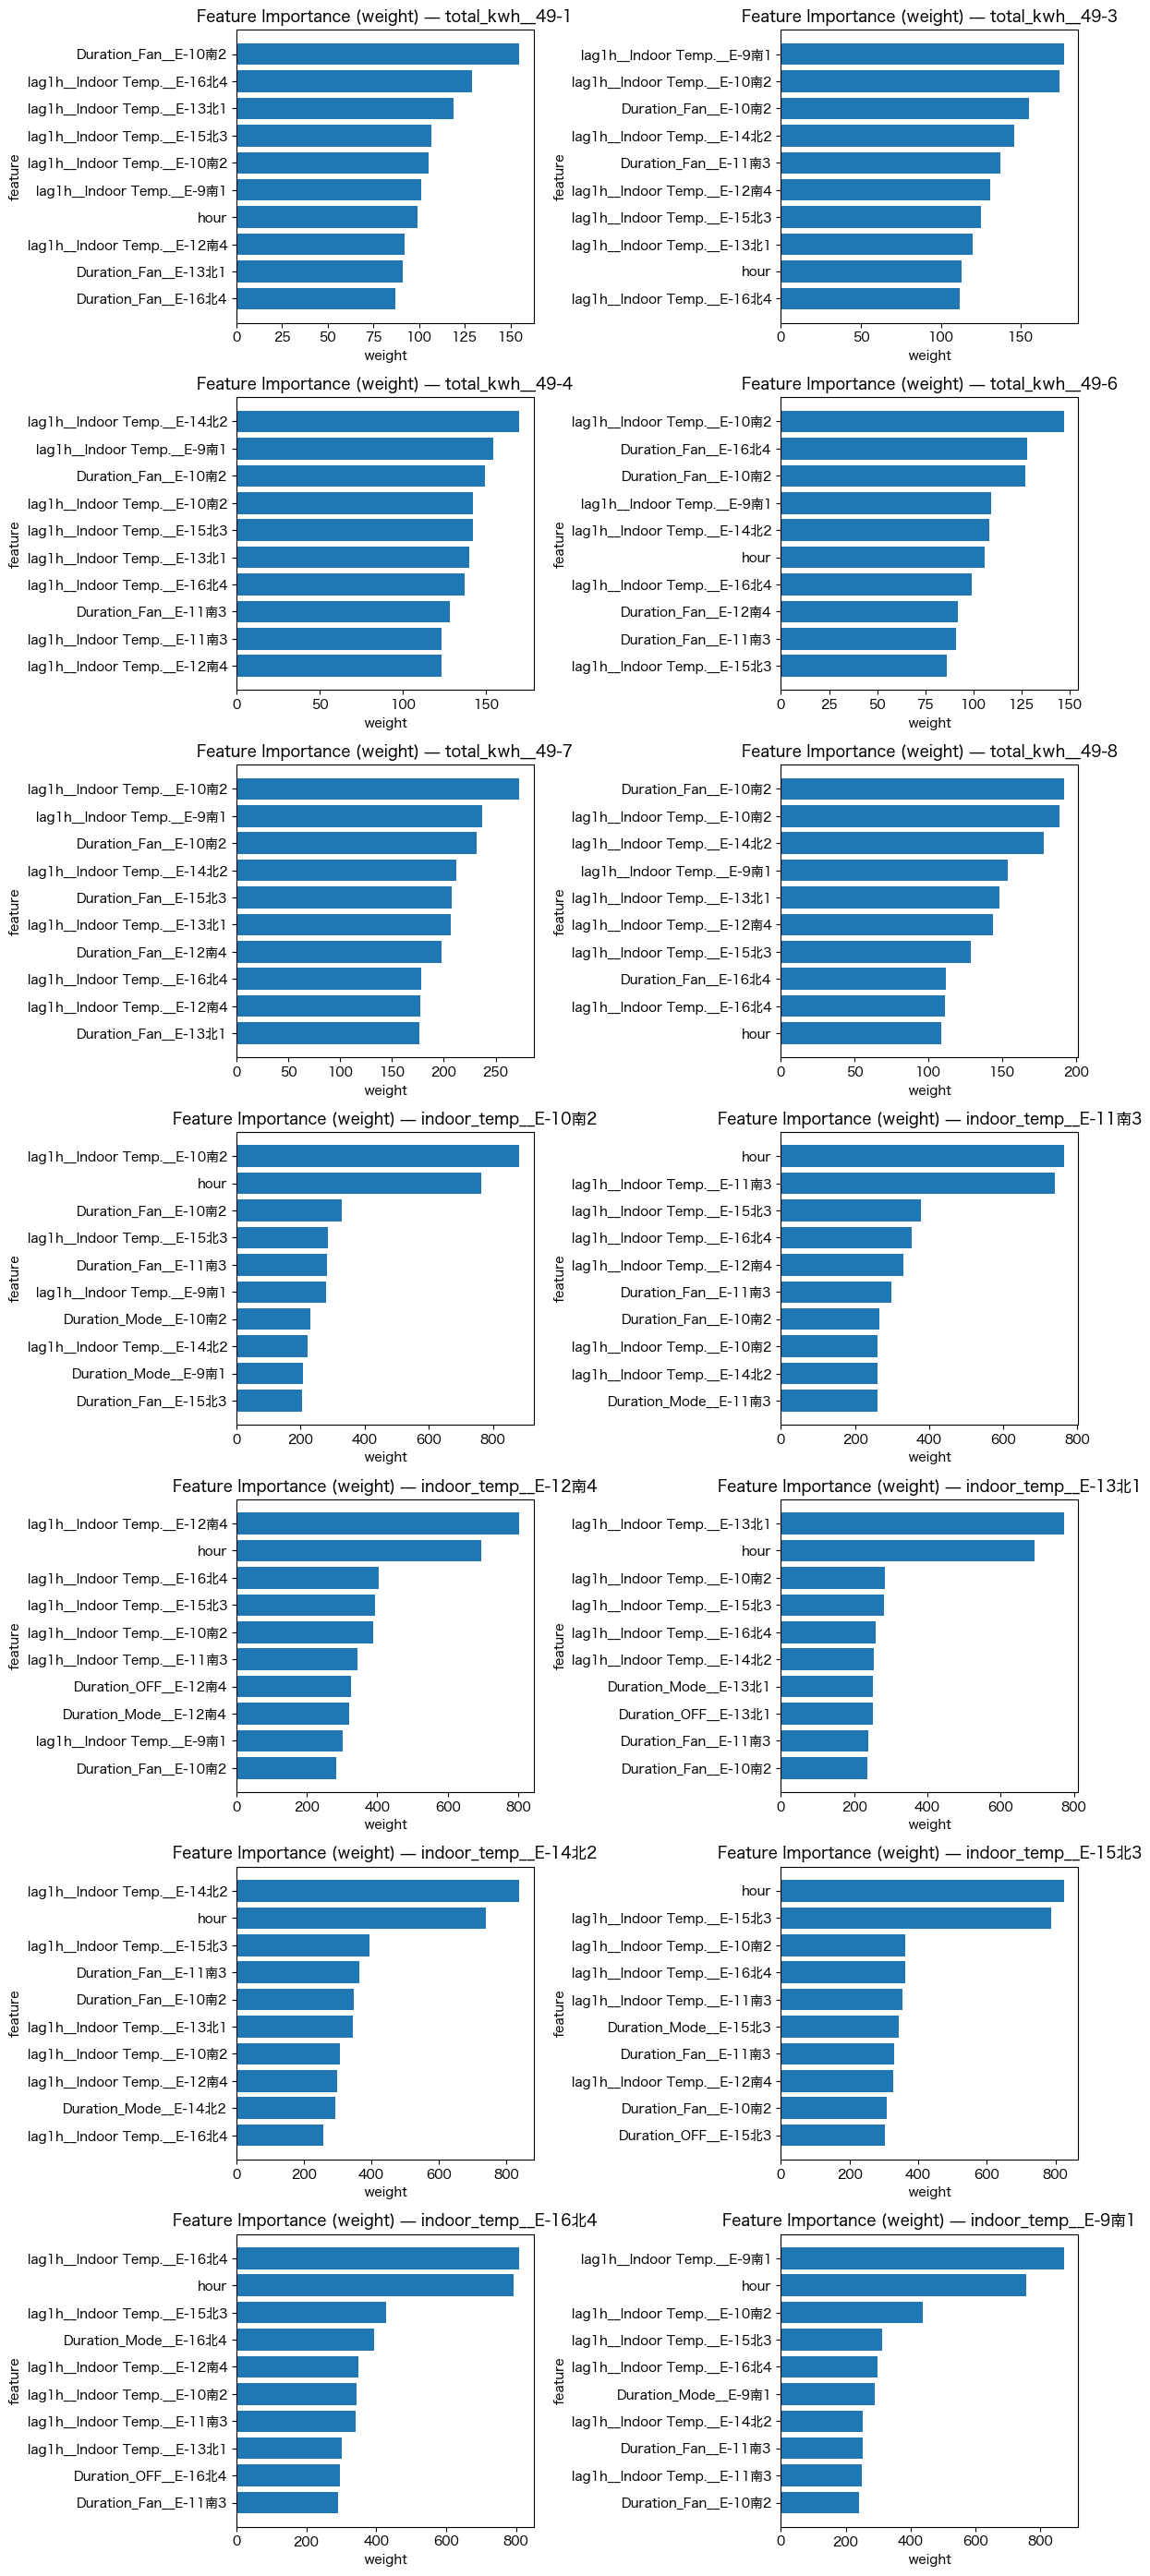

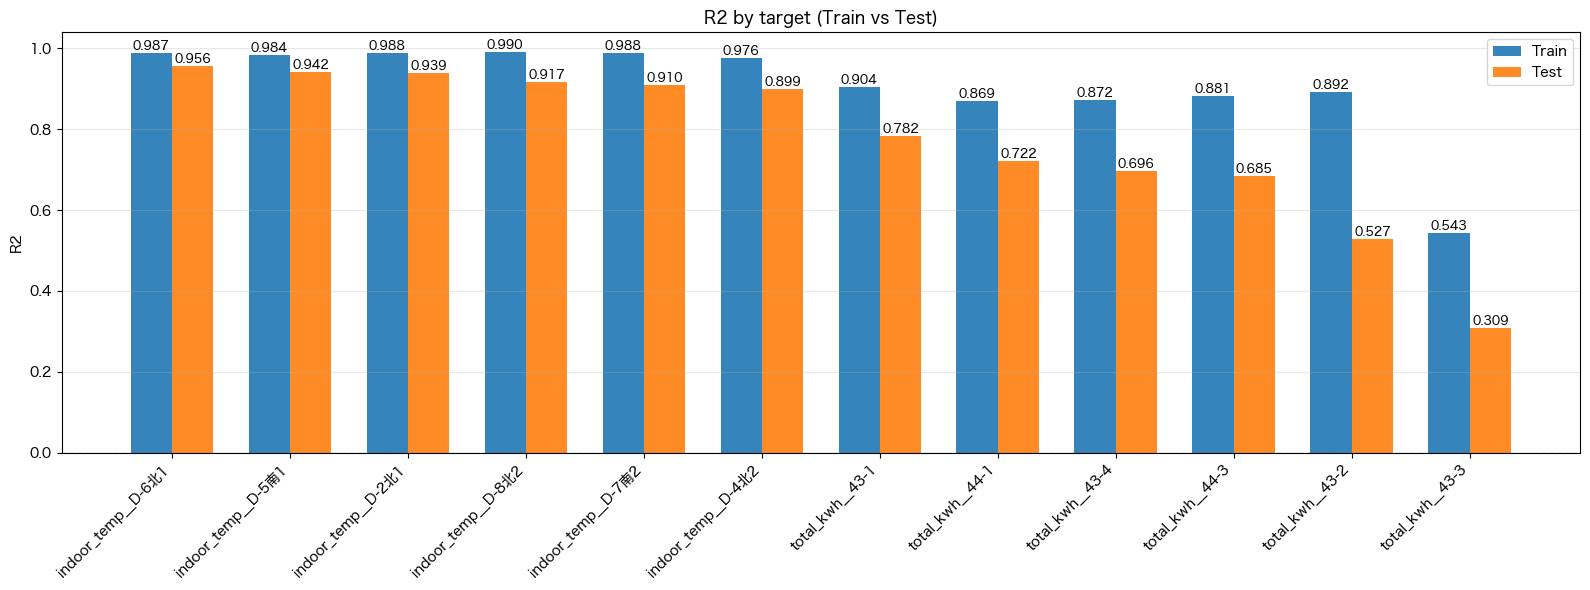

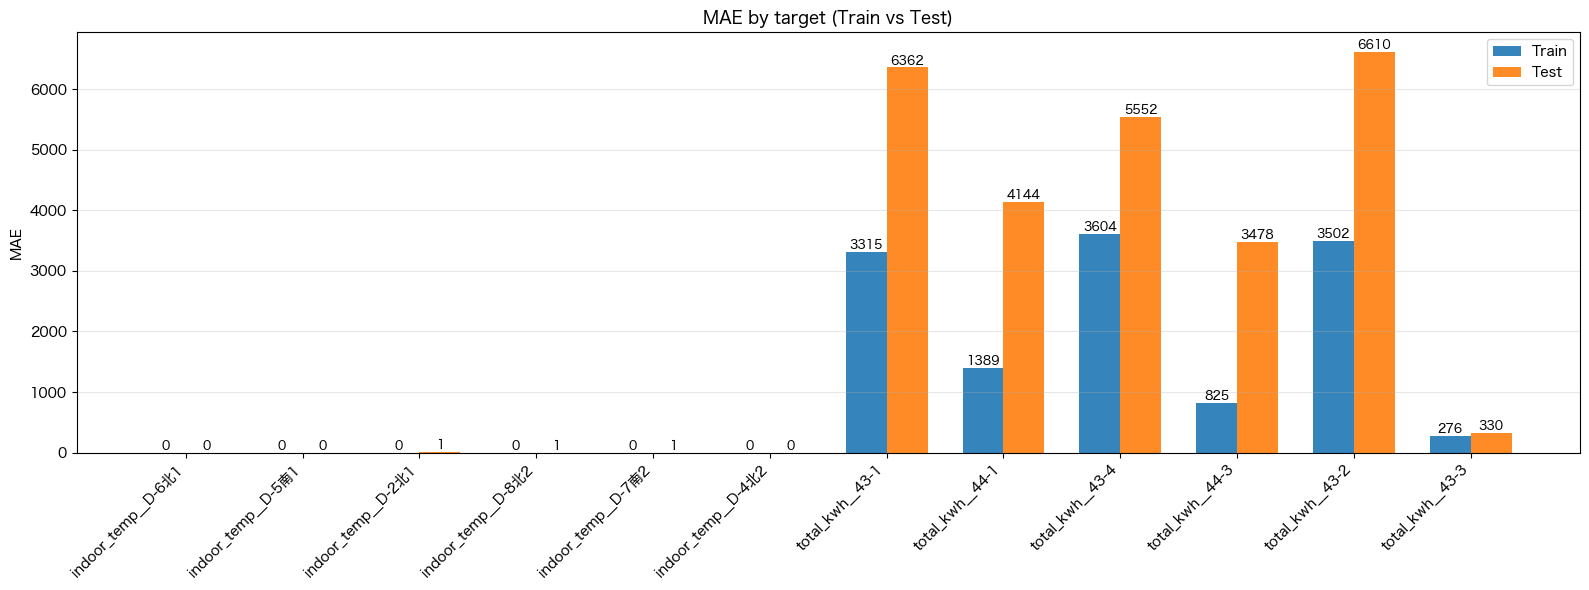

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Area3 の学習中...


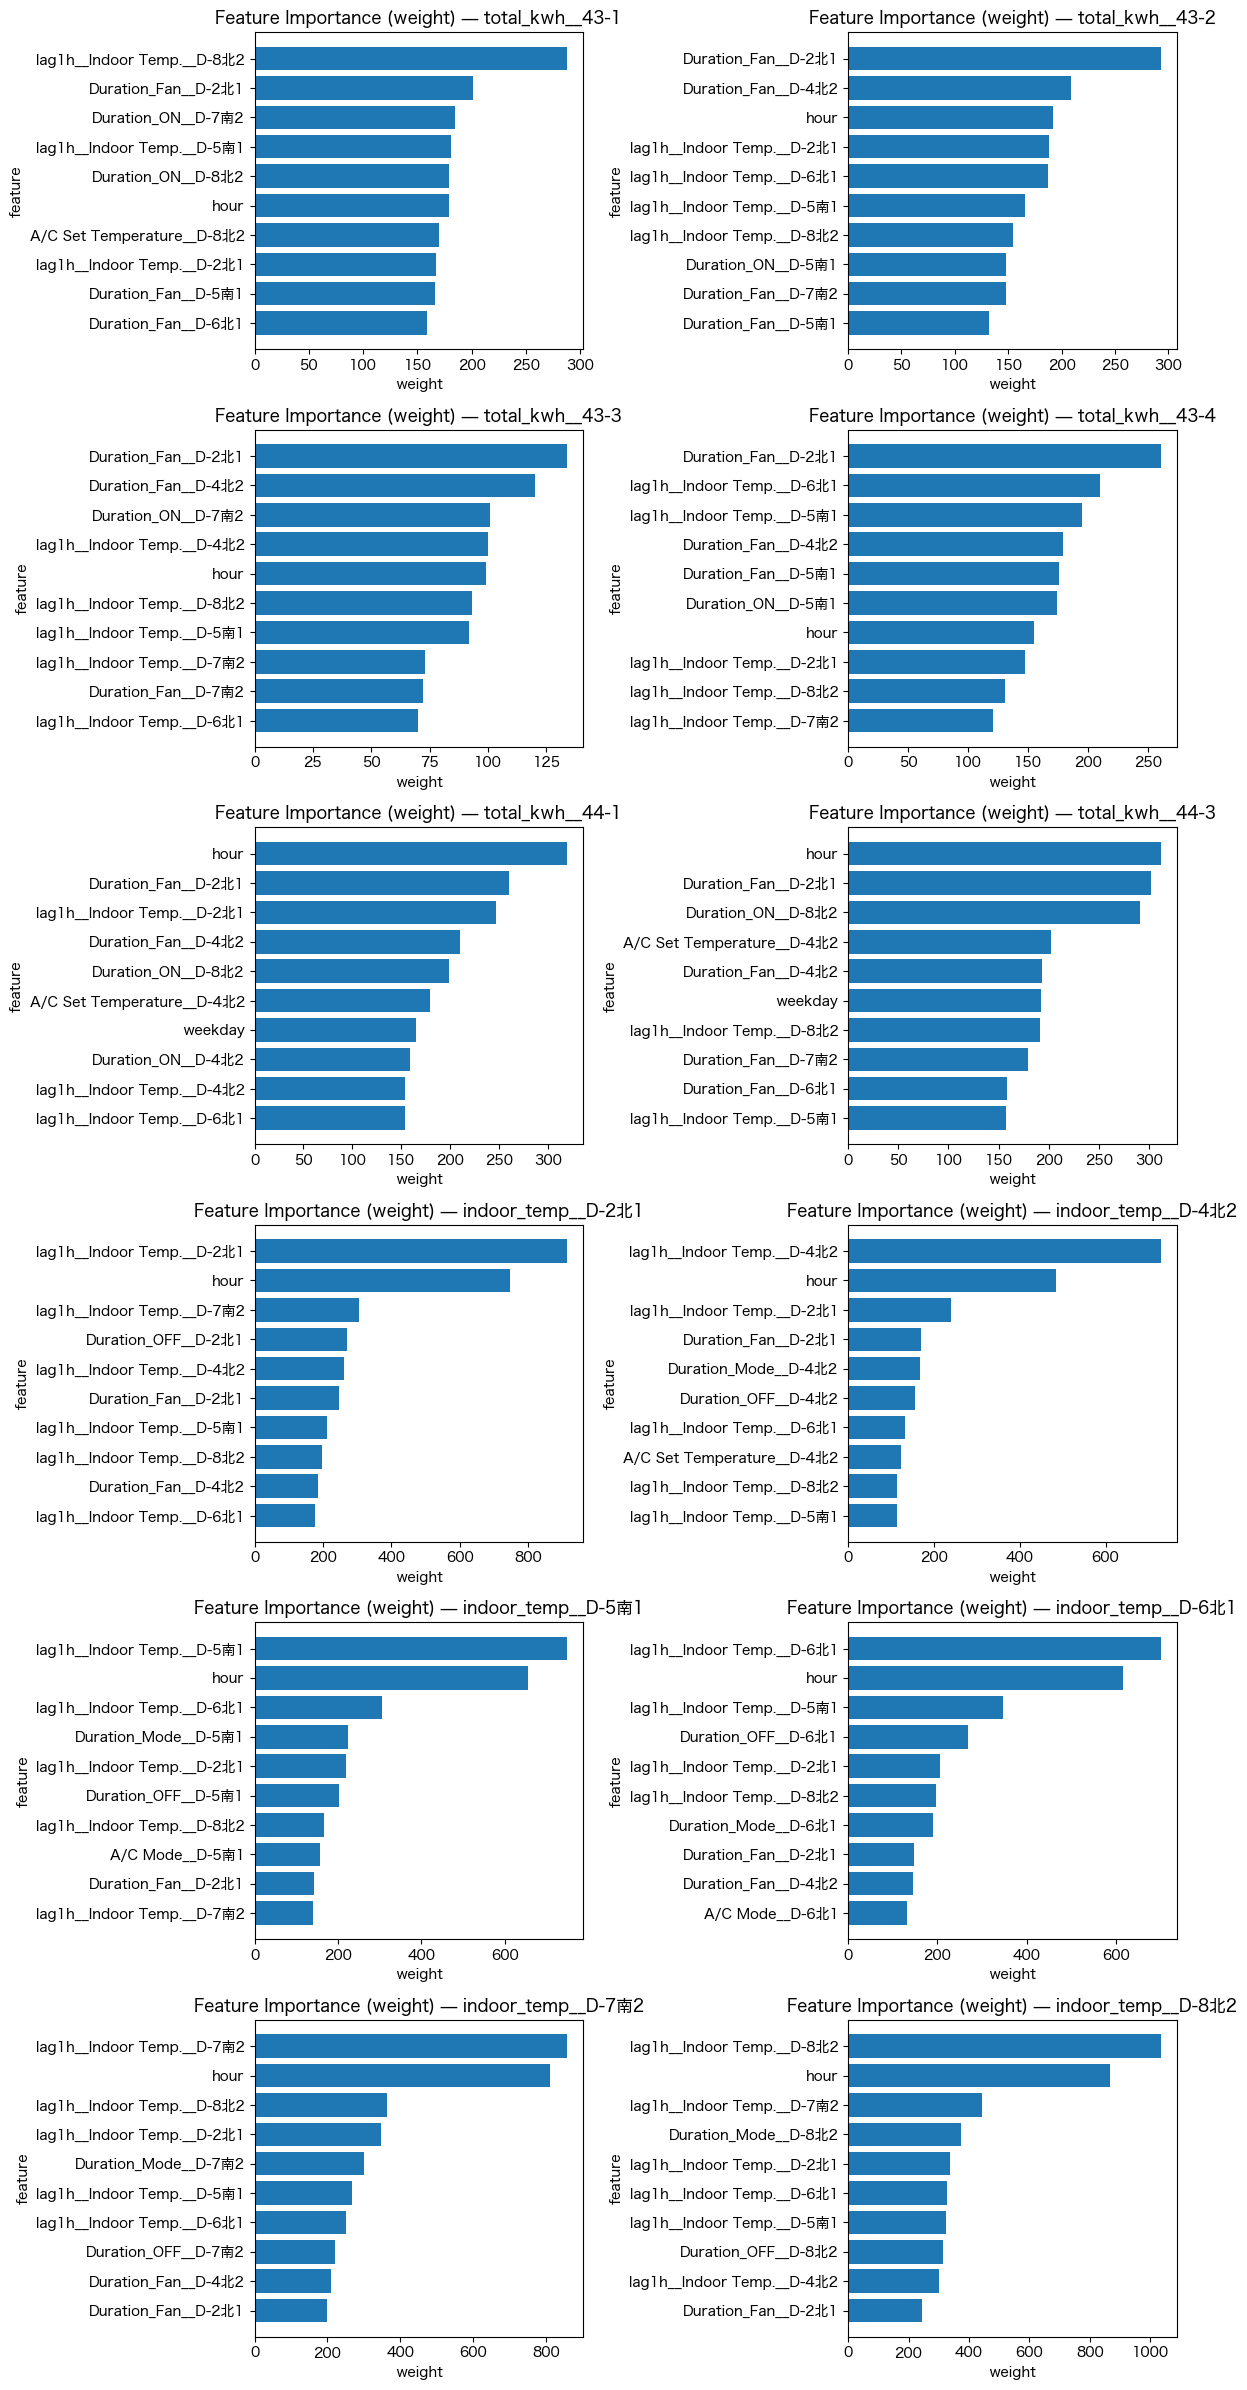

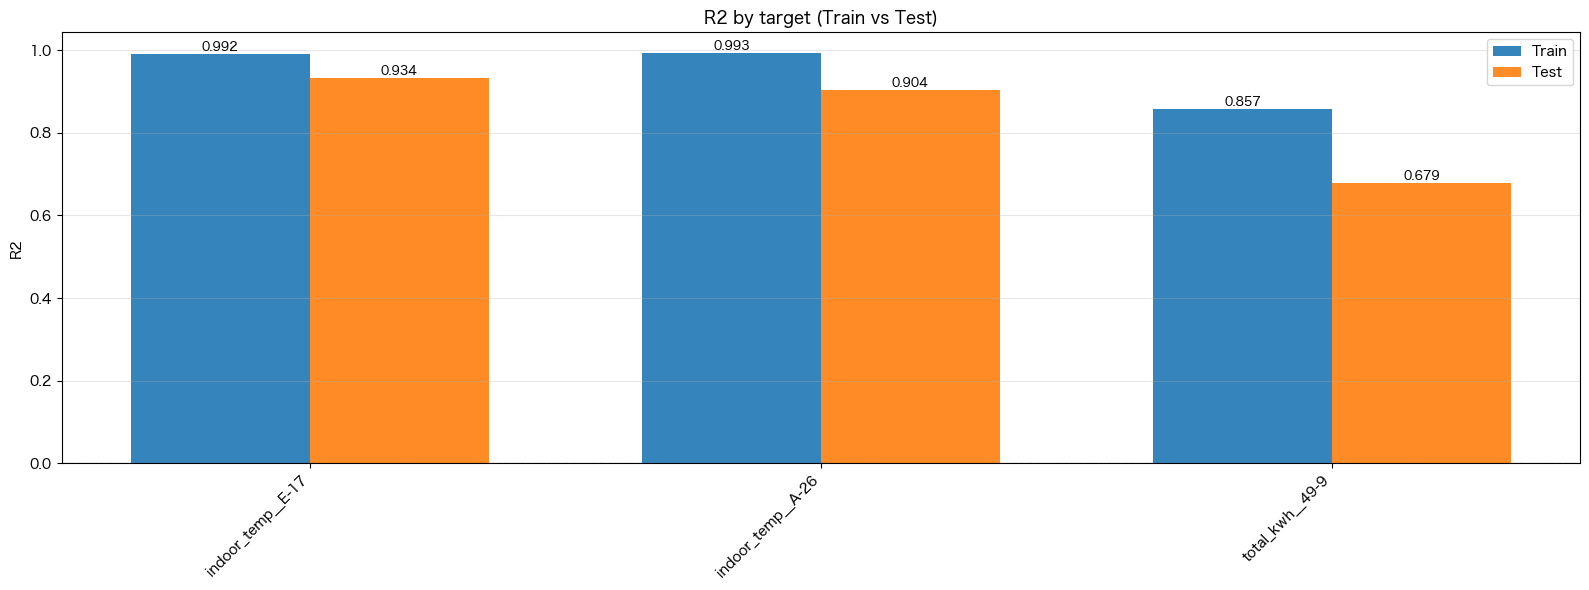

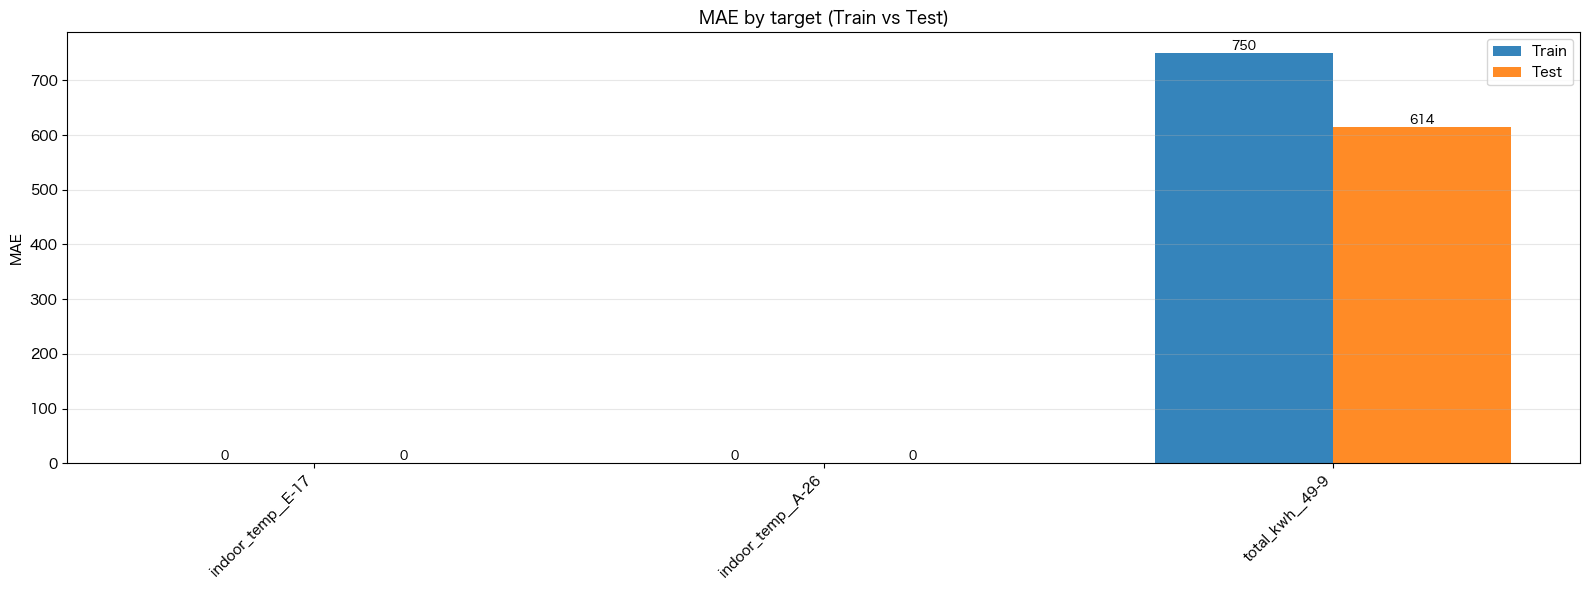

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Area4 の学習中...


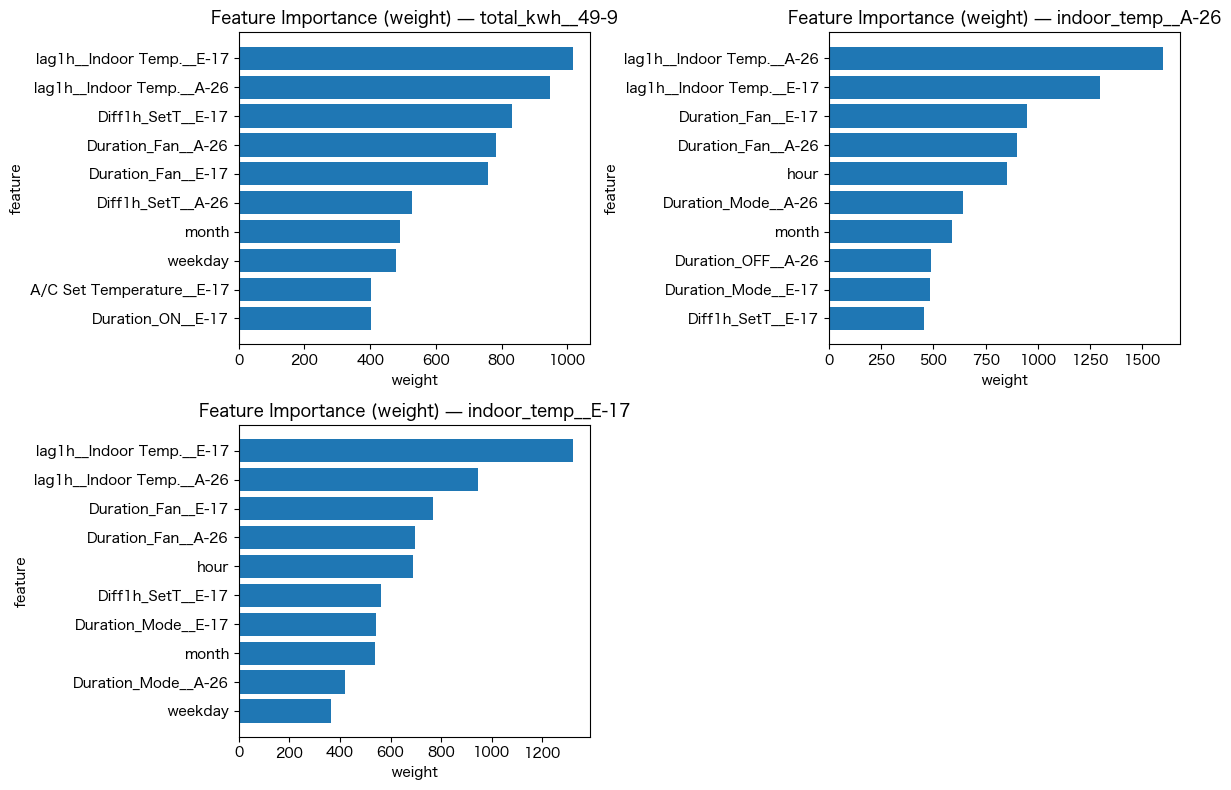

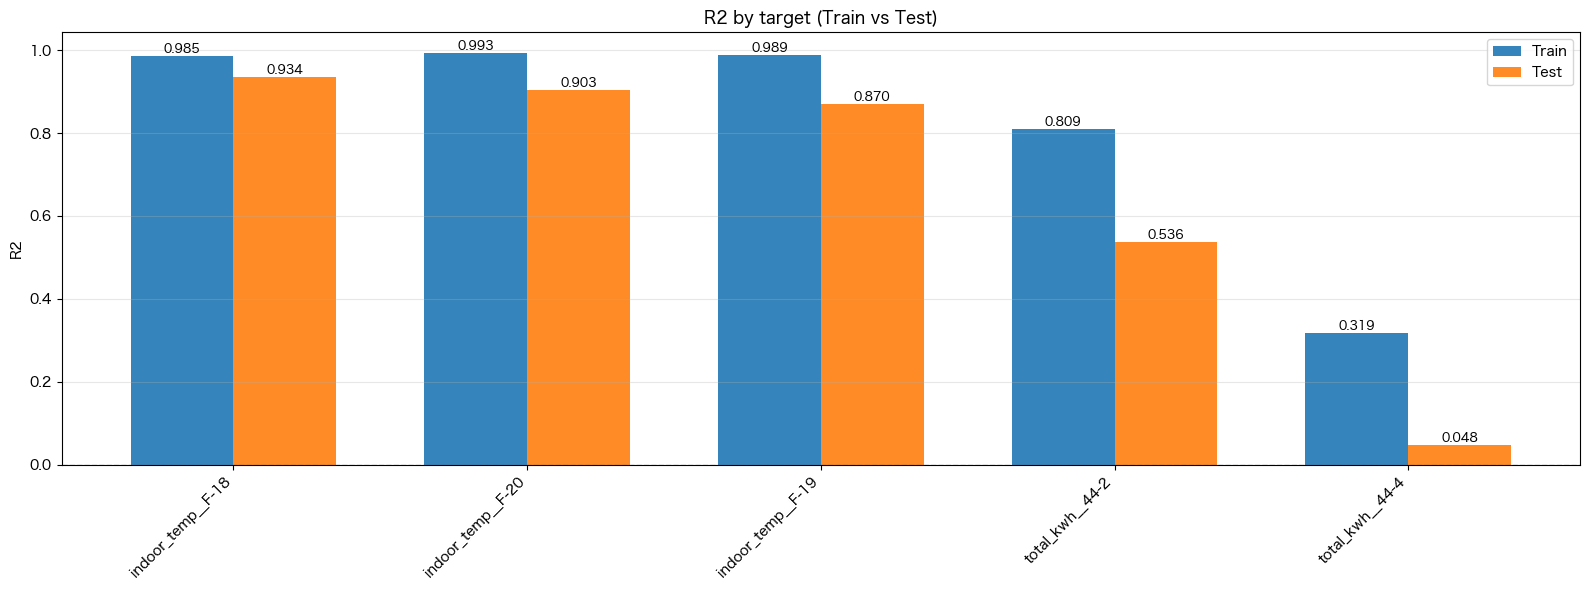

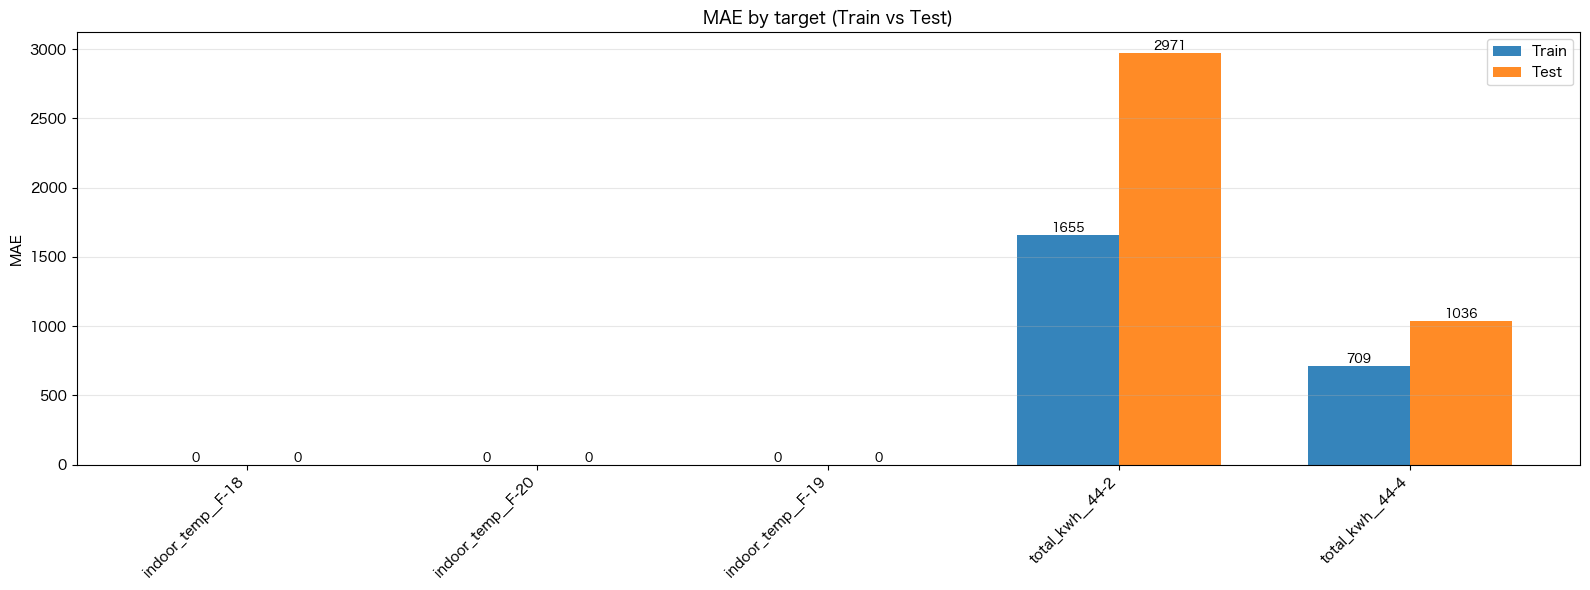

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


MeetingRoom の学習中...


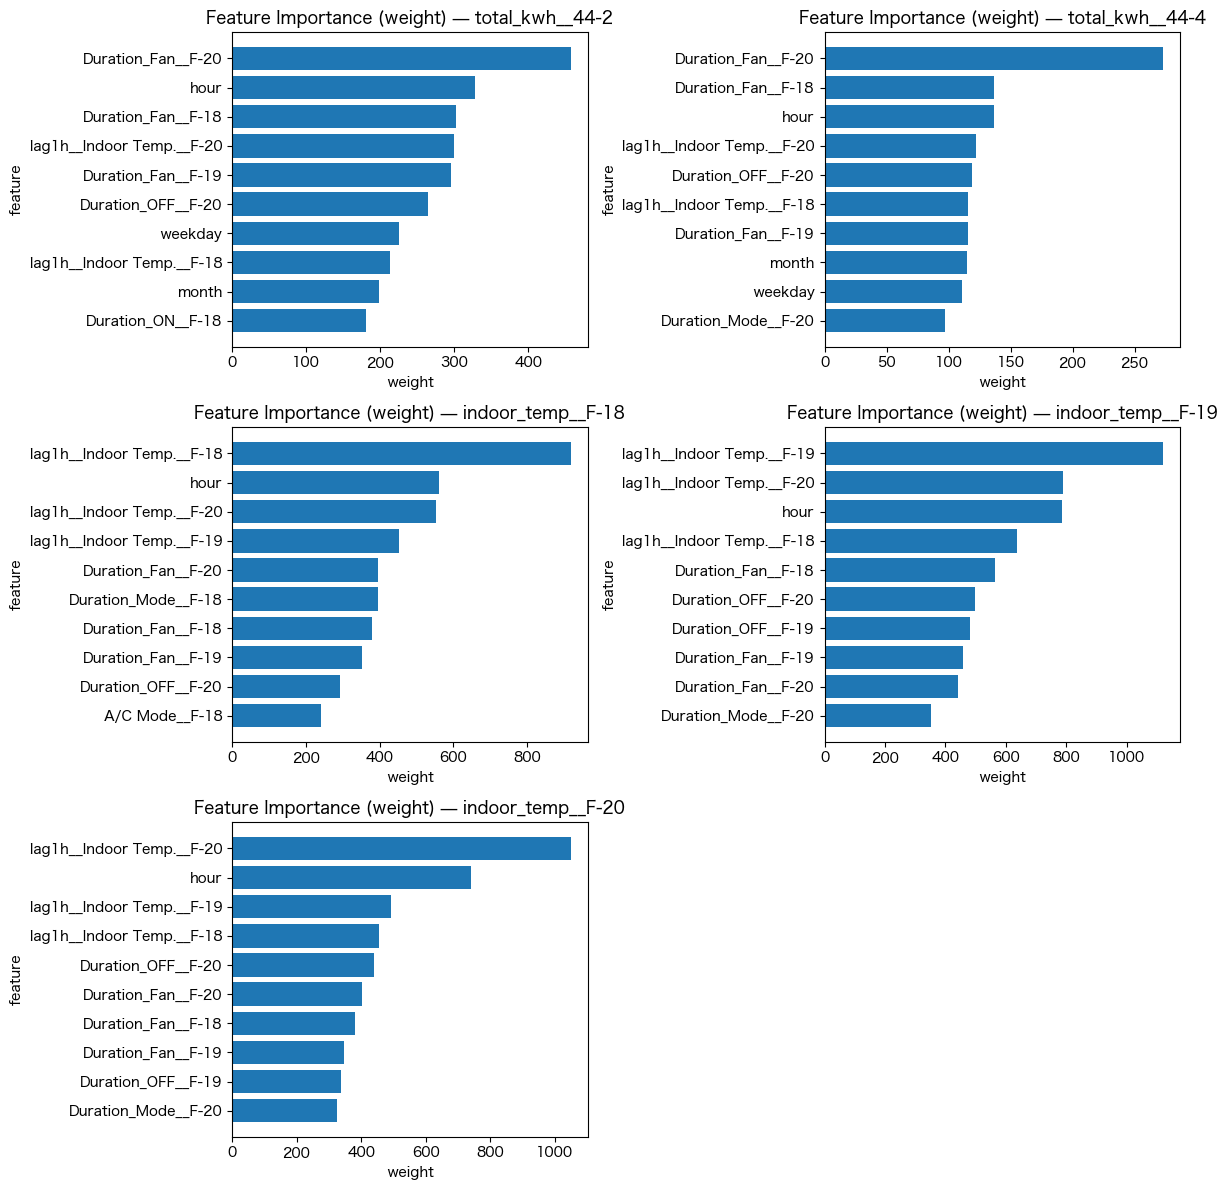

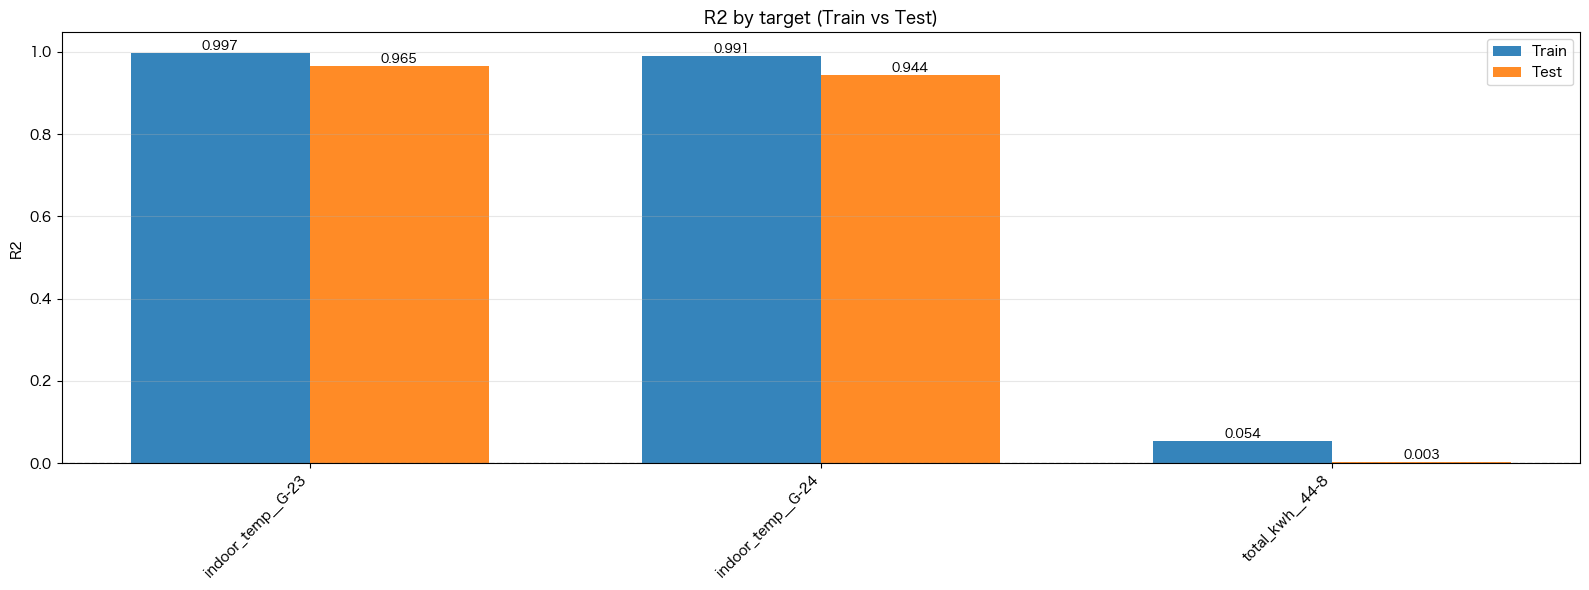

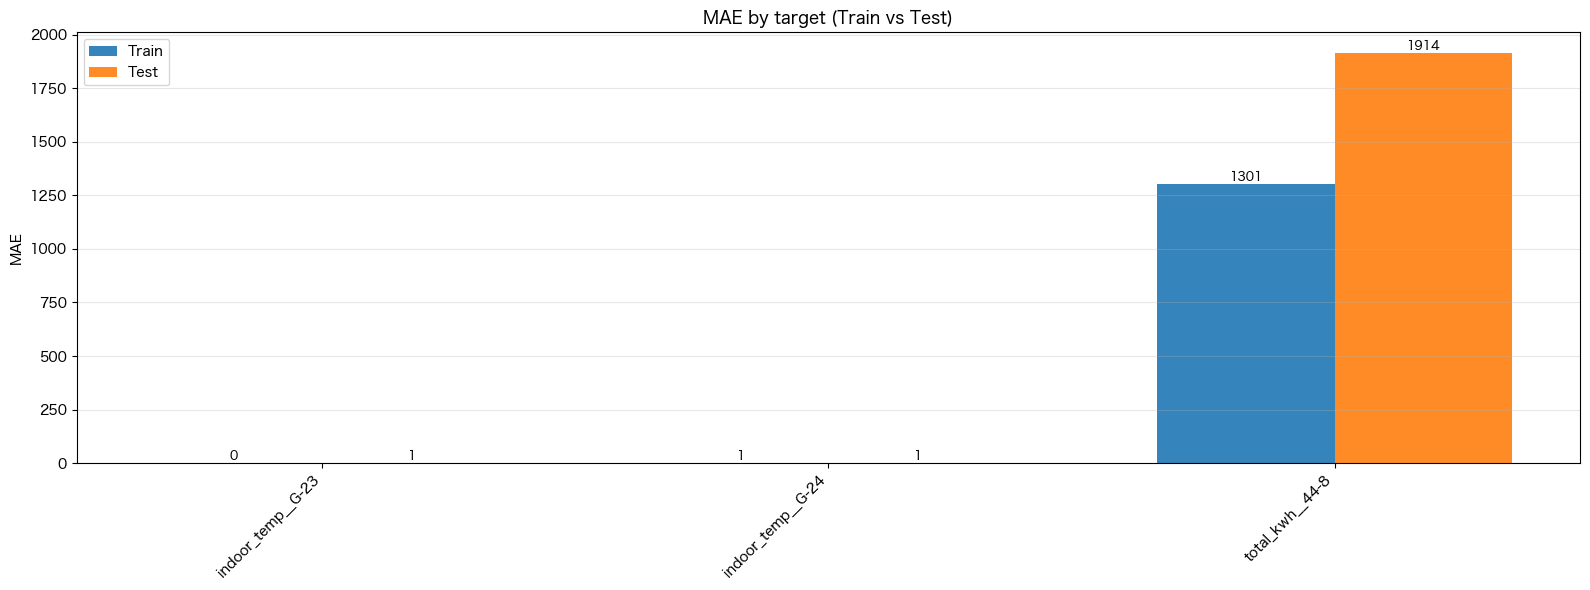

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


BreakRoom の学習中...


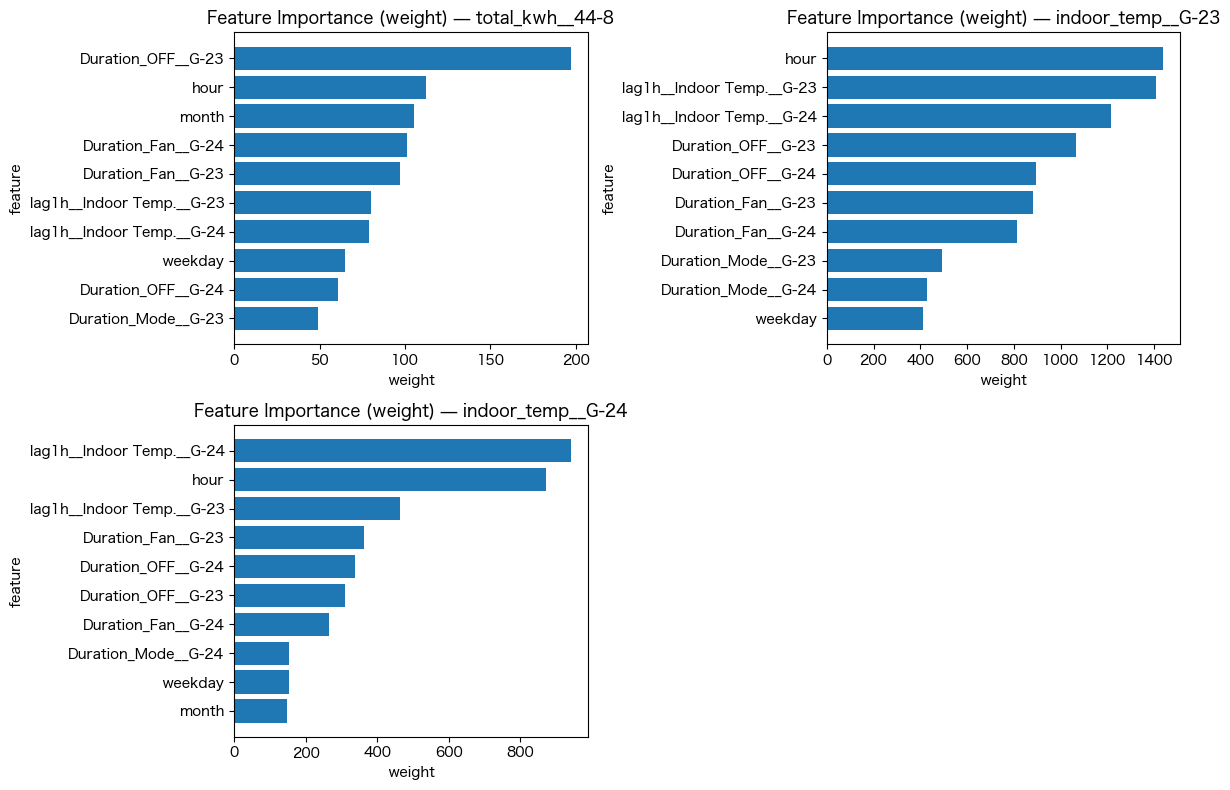

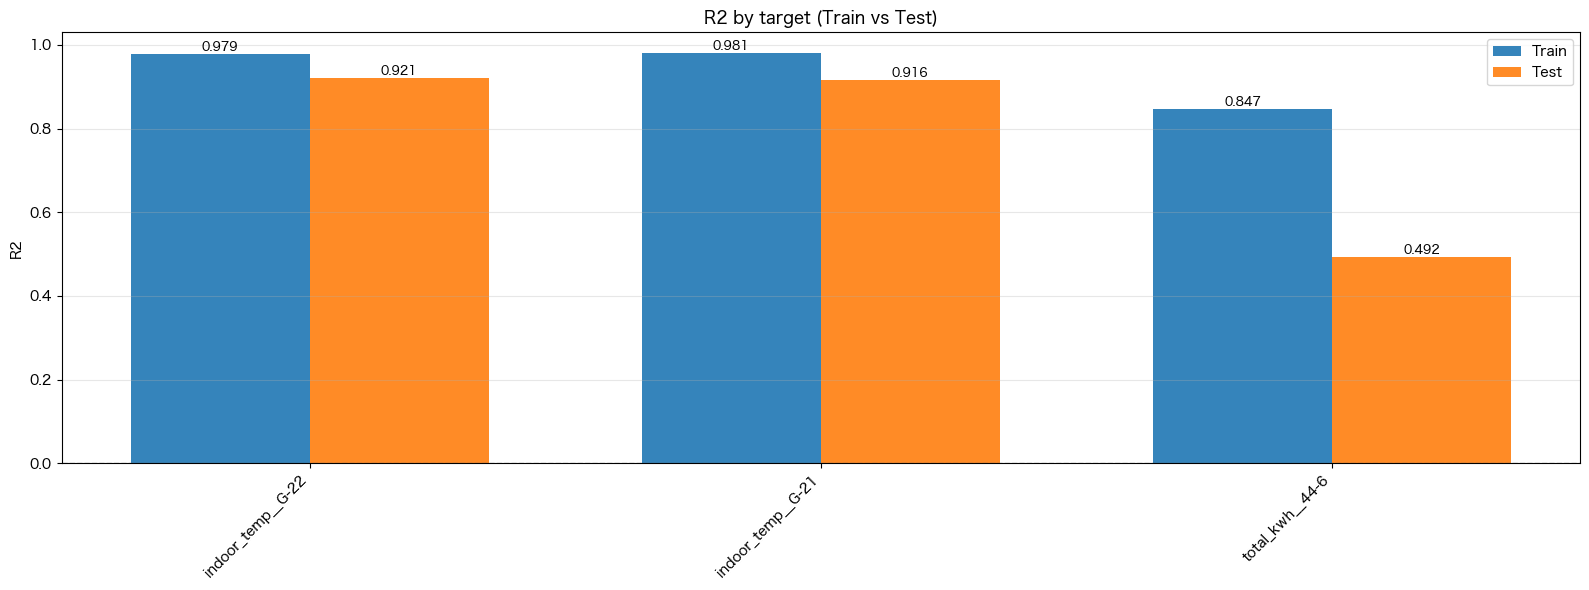

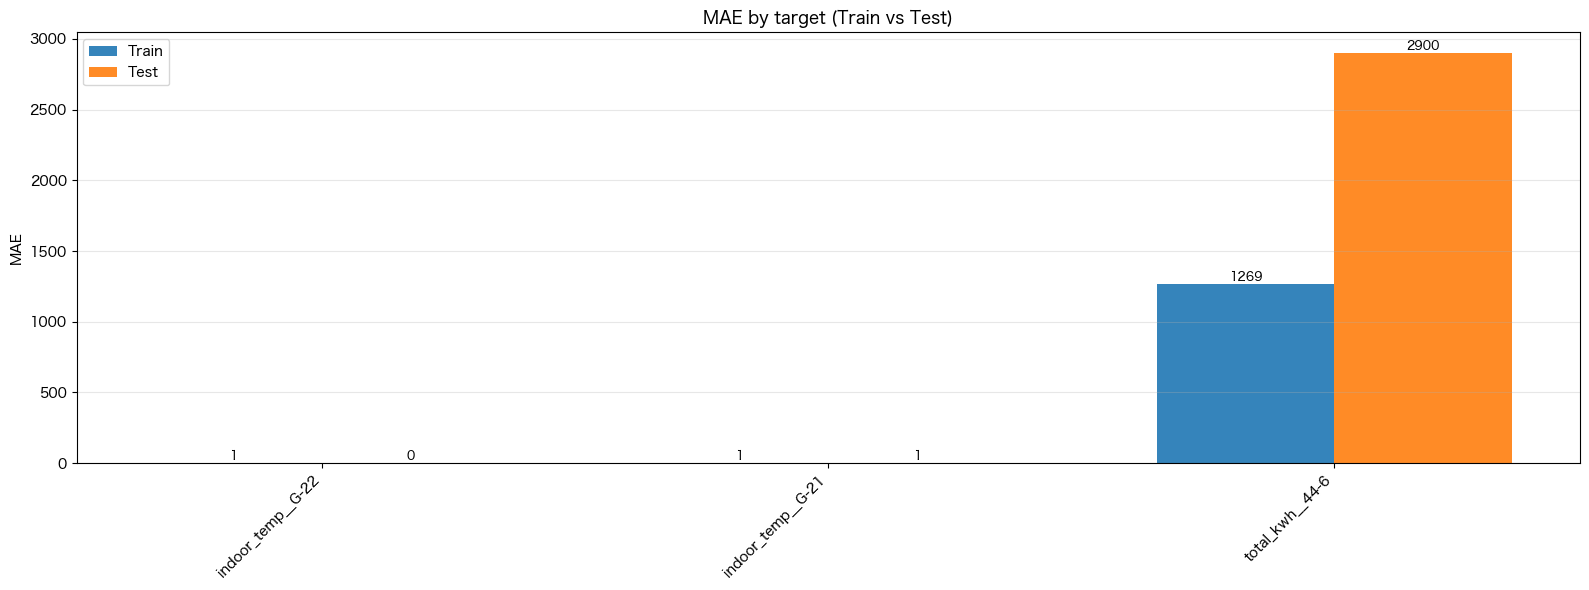

/Users/toukouken/Documents/MENTERU/AIrux8_opti_logic/deep_reinforcement_learning/environment/prediction/visualization.py:149: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


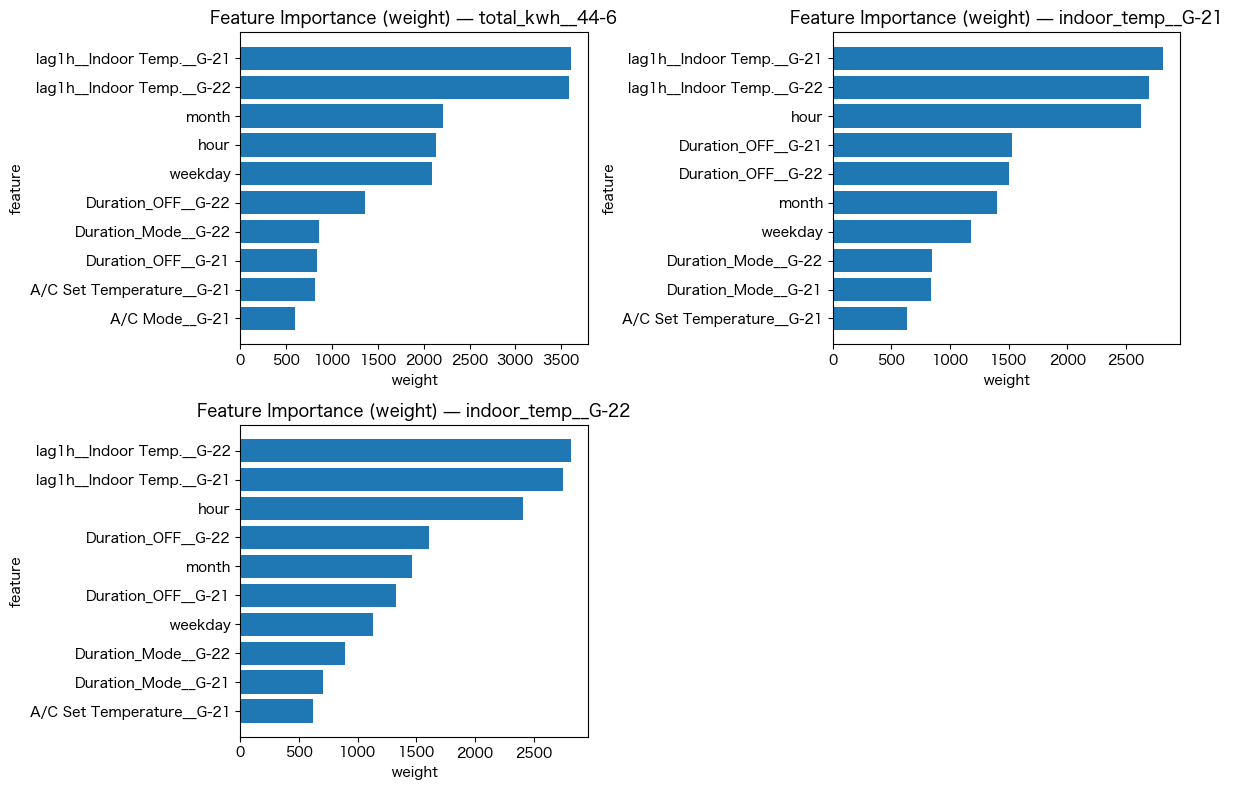

In [4]:
AreaModelApi.learn(area_unit_names, True)